In [1]:
import numpy as np
import skimage.io as ski
import matplotlib.pyplot as plt
%matplotlib inline
# from skimage.viewer import ImageViewer
test_image1 = ski.imread("testout2.png")

test_image2 = ski.imread("testmap2.png")

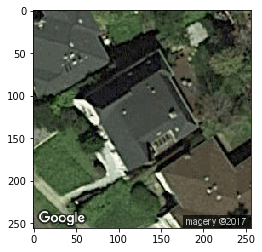

In [2]:
plt.imshow(test_image2)

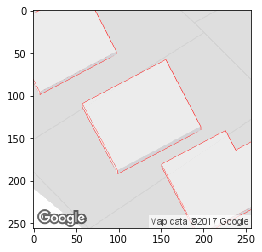

In [3]:
plt.imshow(test_image1)

In [4]:
a = np.empty_like (test_image1)
a[:] = test_image1
for i in range(256):
    for j in range(256):
        if(a[i][j][0] != 236 and a[i][j][1] != 236 and a[i][j][2] != 236):
            a[i][j][0] = 0
            a[i][j][1] = 0
            a[i][j][2] = 0
        else:
            a[i][j][0] = 255
            a[i][j][1] = 255
            a[i][j][2] = 255

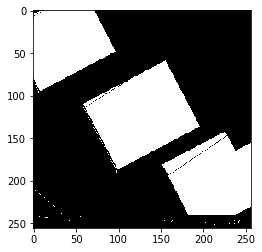

In [5]:
plt.imshow(a)

In [6]:
final_image = a.astype(np.uint8)

In [7]:
import skimage.color as skc

In [8]:
grey_image = skc.rgb2gray(final_image)

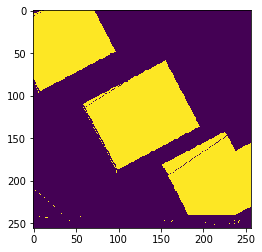

In [9]:
plt.imshow(grey_image)

In [10]:
fgi = (grey_image*255).astype(np.uint8)

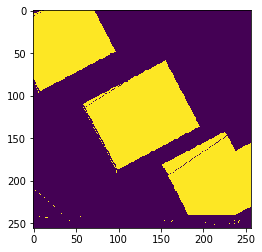

In [11]:
plt.imshow(fgi)

In [12]:
from skimage.feature import canny
edges = canny(fgi)

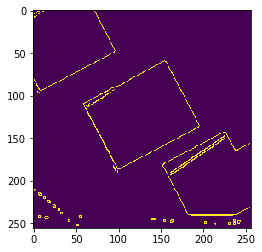

In [13]:
plt.imshow(edges)

In [14]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

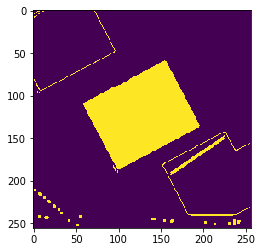

In [15]:
plt.imshow(fill_coins)

In [16]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

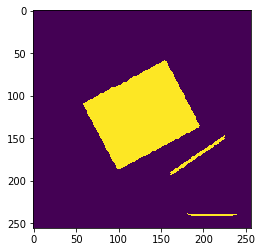

In [17]:
plt.imshow(coins_cleaned)

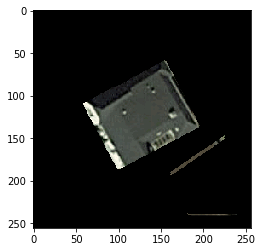

In [18]:
copy_main = np.empty_like (test_image2)
copy_main[:] = test_image2
for i in range(256):
    for j in range(256):
        if(not(coins_cleaned[i][j])):
            copy_main[i][j][0] = 0
            copy_main[i][j][1] = 0
            copy_main[i][j][2] = 0
plt.imshow(copy_main)